<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification Analysis (classify new data into number of class or group)
# Two types (Binary and Multi class classification)
# Two types of algrorithm (Non-Liner [K-NN , SVM , Naivi Bayes , Desision tree])
# (Liner [Logistici Regression , Support Vector Machine])
# For check accuracy three method (Log loss entropy , confusion matrix , AUC-ROC curve)


In [2]:
#Logistic regression (Liner seperable data [binomial , multinomial , ordinal])
#Use Sigmoid Func. --> y = 1/(1+e*-x) if multiple x then x = m1x1+m2x2..+b
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('classification.csv')
df.head(3)

Saving classification.csv to classification.csv


,ID,CGPA,Experience,Department,Placed
0,1,7.00,0,CS,0
1,2,9.30,3,CS,1
2,3,8.43,4,EC,1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

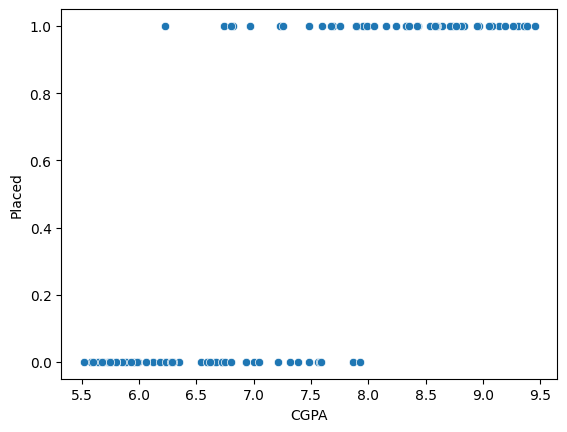

In [12]:
sns.scatterplot(x="CGPA",y="Placed", data=df ) #check data is applicable for logistic..
x= df[["CGPA" , "Experience"]] # this is only 1d array but it expect 2d array hence we need to reshape it in 2d array later
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr= LogisticRegression()
lr.fit(x_train ,y_train)

lr.score(x_test,y_test)

lr.predict([[7 , 0]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[2.28903415, 0.89321229]]), array([-18.55010263]))

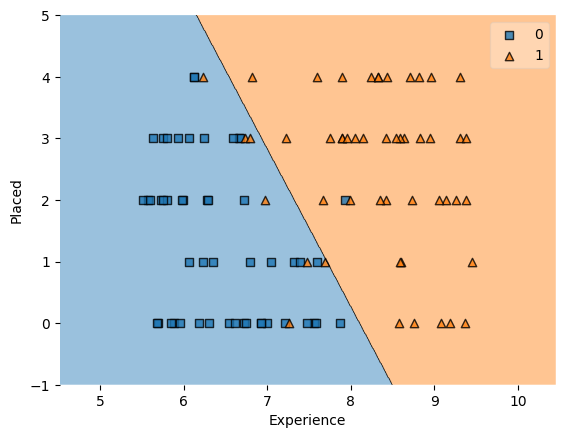

In [17]:
sns.scatterplot(x="Experience",y="Placed", data=df )
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=lr)

lr.coef_ , lr.intercept_ #two coeff bcoz y = m1x1 + m2x2 + b(intercept)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='CGPA', ylabel='Experience'>

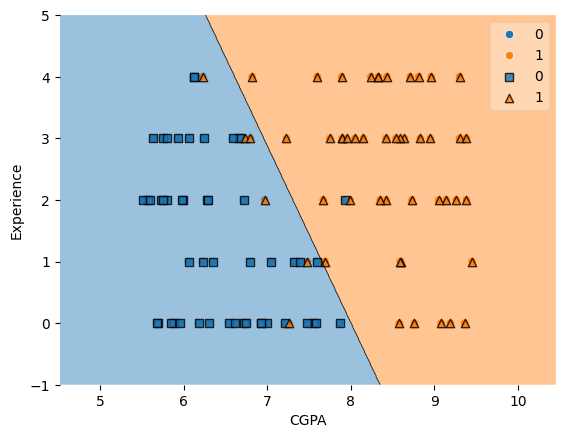

In [26]:
sns.scatterplot(x="CGPA" , y="Experience", data=df, hue="Placed")


x= df[["CGPA" , "Experience"]] # this is only 1d array but it expect 2d array hence we need to reshape it in 2d array later
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

pf = PolynomialFeatures(degree=3) # Convert input data into polimomial feature
pf.fit(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr= LogisticRegression()
lr.fit(x_train ,y_train)

lr.score(x_test,y_test)*100

lr.predict([[7 , 0]])

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=lr)


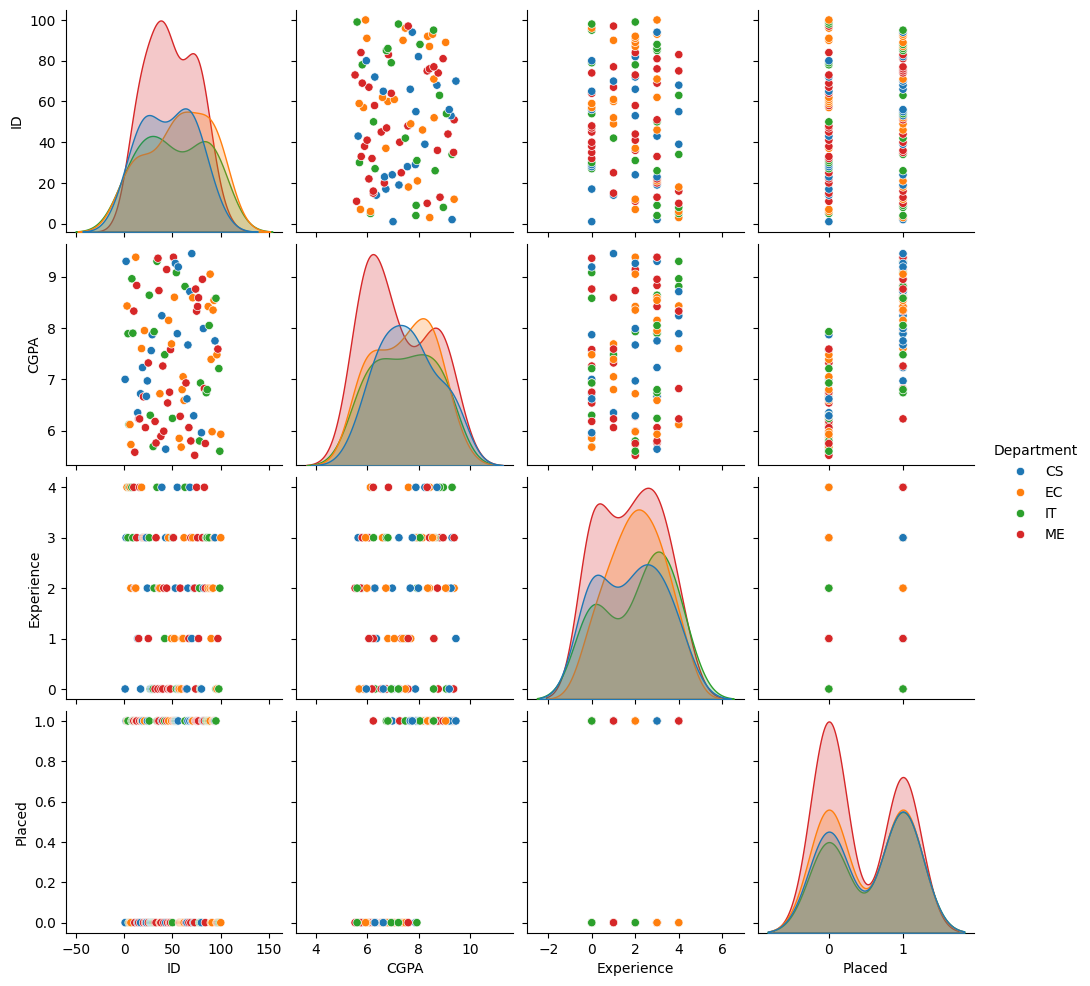

In [31]:
#OVR(one vs rest) for multinomial regression (ovr convert in binomial)
df.head(3)
df["Department"].unique()
sns.pairplot(data=df , hue="Department")
plt.show() # see curvature which is not much overlap is best for selection
#In this data all are more overlap to each other but select feture which is not more overlap


In [42]:
x= df[["CGPA" , "Experience"]]
y= df["Department"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr = LogisticRegression(multi_class="ovr") #OVR method applied
# lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train , y_train)

lr.score(x_test,y_test)*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


15.0

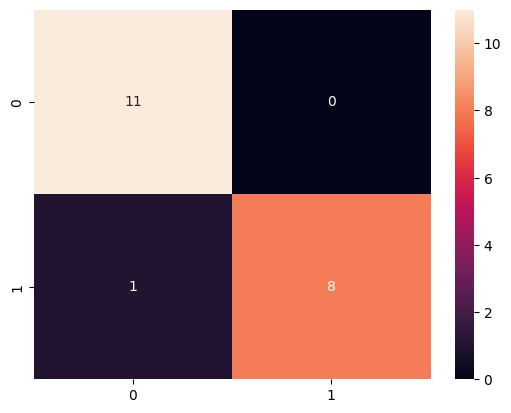

In [45]:
#Confusion mtrix for increase accuracy of logistic model (in linear regression we use loss function)
# error marix used to understand perfermonce of classification model
#generate a matrix betn actual output and predicted output
#(true nagative , true positive , false nagative , false positive) hense accuracy = tn + tp /(tn + tp + fn + fp)
# fn (type 2 error) if it is higer then model will be rejected fp is type 1 error
# sensitivity
# precision : tp/(tp+fp) high precision value less type 1 error (fp)
# recall :  tp/(tp+fn) how many sample is positive in model
#f1-socre : 2 * (precision *recall / precision + recall) High is better for model

x = df[["CGPA" , "Experience"]]
y = df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train , y_train)

lr.score(x_test,y_test)*100

from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True) #Confusion matrix graph
plt.show()

# precision_score(y_test , y_pred)
# recall_score(y_test , y_pred)
# f1_score(y_test , y_pred)


In [48]:
# Handle Imbalance data (remove a biasness in output)
#Random Under sampling (reduce majoity data to same as minority)
#Random Over sampling (Increase size of minority to same as majority)
df["Placed"].value_counts() #here data is same for placed or non placed so data is balanced
# but if not balanced then
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

ru = RandomUnderSampler()
x = df[["CGPA" , "Experience"]]
y = df["Placed"]

x_res , y_res = ru.fit_resample(x,y)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train , y_train)
lr.score(x_test,y_test)*100

90.0

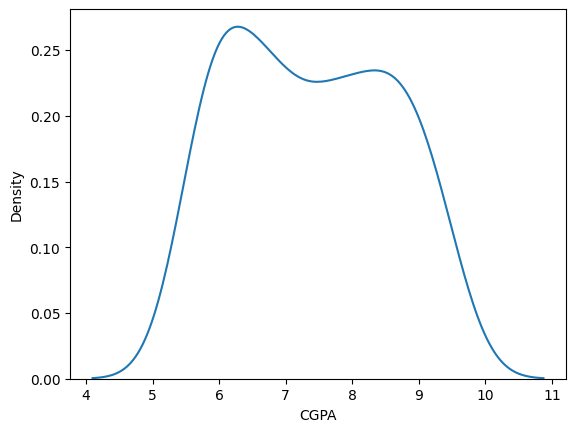

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

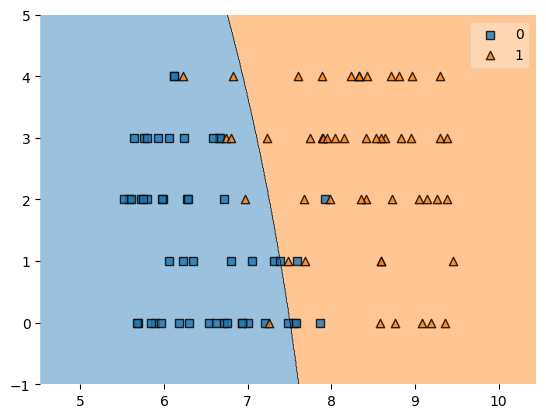

In [56]:
#Naivy Bias (classification based on probability)
# p(r or b) = p(b/r).p(r) = p(r A b) (A is intersection)
# p(a/b) = (p(b/a).p(a))/p(b) ---> Bayes theorm
#gaussian type (input data is in normal distribution nature)
#Bernouli type (input data is only in zero or one (data is encoded))
#mltinomial type (decret data , textual input , data is not in normal distribution)

x = df[["CGPA" , "Experience"]]
y = df["Placed"]

sns.kdeplot(data=df["CGPA"]) #for check data is nonmal distribution or not
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
nb = GaussianNB()
nb.fit(x_train , y_train)
nb.score(x_test,y_test)*100

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=nb)
